In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [2]:
disease=pd.read_csv(r'C:\Users\HP\Downloads\framingham.csv')

In [4]:
disease.drop(['education'],axis=1,inplace=True)

In [5]:
disease.dropna(axis=1,inplace=True)

In [6]:
disease.rename(columns={'male':'Sex_male'},inplace=True)

In [7]:
disease.head()

,Sex_male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD
0,1,39,0,0,0,0,106.0,70.0,0
1,0,46,0,0,0,0,121.0,81.0,0
2,1,48,1,0,0,0,127.5,80.0,0
3,0,61,1,0,1,0,150.0,95.0,1
4,0,46,1,0,0,0,130.0,84.0,0


In [8]:
disease.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

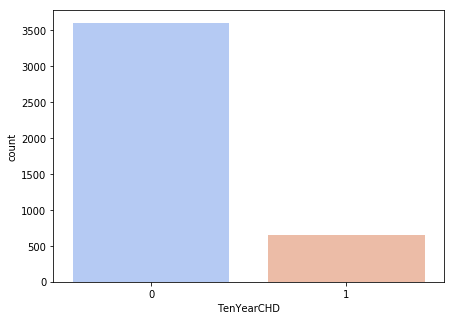

In [13]:
plt.figure(figsize = (7, 5)) 
sns.countplot(x ='TenYearCHD', data = disease,  
             palette ="coolwarm" ) 
plt.show() 

In [14]:
X=np.asarray(disease[['age','Sex_male','currentSmoker','prevalentStroke','prevalentHyp','diabetes','sysBP','diaBP']])
y=np.asarray(disease['TenYearCHD'])

In [16]:
X=preprocessing.StandardScaler().fit(X).transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [18]:
print ('Train set:', X_train.shape,  y_train.shape) 
print ('Test set:', X_test.shape,  y_test.shape) 

Train set: (2968, 8) (2968,)
Test set: (1272, 8) (1272,)


In [19]:
from sklearn.linear_model import LogisticRegression
Regressor=LogisticRegression()
Regressor.fit(X_train,y_train)
predictions=Regressor.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,predictions)
print(cm)

[[1077    7]
 [ 180    8]]


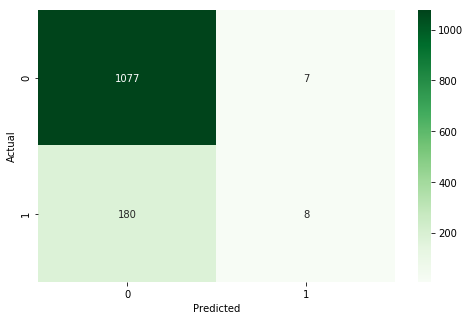

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d',cmap="Greens")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.53      0.04      0.08       188

   micro avg       0.85      0.85      0.85      1272
   macro avg       0.70      0.52      0.50      1272
weighted avg       0.81      0.85      0.80      1272



In [27]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,predictions)

0.8529874213836478